# Inicialização do Código

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
deals = pd.read_excel('/content/drive/MyDrive/Dados/Invest Startups 2020-21/aportes_em_startups_2020_e_2021.xlsx')

In [ ]:
deals.dropna(subset=['Sede (Estado-US/País)'], inplace=True)
deals.reset_index(drop=True, inplace=True)

In [ ]:
deals

,Investidores,Valor,Rodada de Investimento,Empresa,Sede (Cidade),Sede (Estado-US/País),Setor,Sobre a Empresa,Mês,Ano
0,"Atsushi Taira, participation from Y Combinator...",3000000.0,Seed,Kisan Network,Gurugram,India,Agtech,Integrated Supply Chain/Direct Selling Platfor...,Janeiro,2020
1,"Unusual Ventures, participation from Jason Cal...",4000000.0,U,Kloud.io,San Jose,CA,Data/Analytics,Data Preparation Platform To Save Time For Ana...,Janeiro,2020
2,"Combine, Haystack Ventures, Homebrew, Shrug Ca...",4500000.0,Seed,Haus,Sonoma County,CA,Foodtech,Spirits Brand,Janeiro,2020
3,"Skip Capital, participation from Stride.VC, Al...",5000000.0,U,Pando Health,London,UK,Biotech/Healthy,Teamwork Tool In Healthcare,Janeiro,2020
4,"Tribeca Venture Partners, participation from H...",5000000.0,A,1Huddle,Newark,NJ,Enterprise,Mobile Game-Based Employee Training Solutionn,Janeiro,2020
...,...,...,...,...,...,...,...,...,...,...
11963,"Jazz Venture Partners, participation from Cana...",30000000.0,B,Sounding Board,Aliso Viejo,Calif.,Enterprise,Leadership Coaching Platform,Dezembro,2021
11964,"Craft Ventures, participation from HWVP, OMERS...",62000000.0,B,Klue,Vancouver,Canada,Enterprise,Ai-Powered Competitive Enablement Platform,Dezembro,2021
11965,"Founders Circle Capital, Mindset Ventures, Chi...",67000000.0,B,Hologram,Chicago,Ill.,Telecoms,Cellular Platform For Iot Connectivity,Dezembro,2021
11966,"The Westly Group, participation from Thomvest ...",100000000.0,C,CyCognito,Palo Alto,Calif.,Cybersecurity,Attack Surface Management,Dezembro,2021


In [ ]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11968 entries, 0 to 11967
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investidores            11966 non-null  object 
 1   Valor                   11968 non-null  float64
 2   Rodada de Investimento  11966 non-null  object 
 3   Empresa                 11968 non-null  object 
 4   Sede (Cidade)           10038 non-null  object 
 5   Sede (Estado-US/País)   11968 non-null  object 
 6   Setor                   11966 non-null  object 
 7   Sobre a Empresa         11917 non-null  object 
 8   Mês                     11968 non-null  object 
 9   Ano                     11968 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 935.1+ KB


# Funções Especiais

In [ ]:
def spaceFilter(dataframe):
  dataframe['Space Filter'] = 0
  space_keyword = re.compile(r'space', flags=re.IGNORECASE)
  for i, valor in dataframe.iterrows():
    if type(valor['Setor']) != str:
      continue
    if re.search(space_keyword, valor['Setor']) != None:
      dataframe.loc[i,'Space Filter'] = 1
  space_deals = dataframe[dataframe['Space Filter'] == 1]
  space_deals.drop(columns=['Space Filter'], inplace=True)
  dataframe.drop(columns=['Space Filter'], inplace=True)
  return space_deals

In [ ]:
def investorsList(dataframe):
  investorsList = []
  for i, valor in dataframe.iterrows():
    if type(valor['Investidores']) != str:
      continue
    deal_investors = re.split(r', ', valor['Investidores'])
    for investor in deal_investors:
      investor = investor.replace('/','')
      if investor != 'et al.':
        investorsList.append(investor)
  return investorsList

In [ ]:
def keywordFilter(dataframe,column_name,keywords_list):
  dataframe['Keyword Filter'] = 0
  if type(keywords_list) != list:
    print('****keywords_list parameter must be a list type****')
    return np.nan
  for keyword in keywords_list:
    pattern = re.compile(keyword, flags=re.IGNORECASE)
    for i, valor in dataframe.iterrows():
      if type(valor[column_name]) != str:
        continue
      if re.search(pattern, valor[column_name]) != None:
        dataframe.loc[i,'Keyword Filter'] = 1
  keyword_matches = dataframe[dataframe['Keyword Filter'] == 1]
  keyword_matches.drop(columns=['Keyword Filter'], inplace=True)
  dataframe.drop(columns=['Keyword Filter'], inplace=True)
  return keyword_matches

# Contrução do Catálogo de Investidores

In [ ]:
def investorsCatalog(investors_list):
  investors_list = adjustingInvestorsList(investors_list)
  investors_dataframe = pd.DataFrame(np.nan,columns=['Número de Empresas Investidas',
                                                     'Número de Investimentos em Startups Brasileiras',
                                                     'Número de Investimentos em Startups Espaciais',
                                                     'Locais onde Investiu','Rodadas que Participou',
                                                     'Setores que Investiu', 
                                                     'Valor da Menor/Maior Rodada que Participou (em U$)',
                                                     'Valor da Menor/Maior Rodada de Startup Brasileira que Participou (em U$)', 
                                                     'Valor da Menor/Maior Rodada de Startup Espacial que Participou (em U$)'], index=investors_list)
  investors_dataframe.loc[:,'Número de Empresas Investidas'] = 0
  investors_dataframe.loc[:,'Número de Investimentos em Startups Brasileiras'] = 0
  investors_dataframe.loc[:,'Número de Investimentos em Startups Espaciais'] = 0
  for investor in investors_dataframe.index:
    deals_investor_is_involved = keywordFilter(deals,'Investidores',[investor])
    investors_dataframe.loc[investor,'Número de Empresas Investidas'] = deals_investor_is_involved.shape[0]
    investors_dataframe.loc[investor,'Número de Investimentos em Startups Brasileiras'] =  keywordFilter(deals_investor_is_involved,'Sede (Estado-US/País)', ['Brazil']).shape[0]
    investors_dataframe.loc[investor,'Número de Investimentos em Startups Espaciais'] =  spaceFilter(deals_investor_is_involved).shape[0]
    investors_dataframe.loc[investor,'Locais onde Investiu'] = investmentLocations(deals_investor_is_involved)
    investors_dataframe.loc[investor,'Rodadas que Participou'] = investmentRounds(deals_investor_is_involved)
    investors_dataframe.loc[investor,'Setores que Investiu'] = investmentIndustries(deals_investor_is_involved)
    investors_dataframe.loc[investor, 'Valor da Menor/Maior Rodada que Participou (em U$)'] = highestAndlowestRoundInvolved(deals_investor_is_involved)
    investors_dataframe.loc[investor, 'Valor da Menor/Maior Rodada de Startup Brasileira que Participou (em U$)'] = highestAndlowestRoundInvolved(keywordFilter(deals_investor_is_involved,'Sede (Estado-US/País)', ['Brazil']))
    investors_dataframe.loc[investor, 'Valor da Menor/Maior Rodada de Startup Espacial que Participou (em U$)'] = highestAndlowestRoundInvolved(spaceFilter(deals_investor_is_involved))
  return investors_dataframe

In [ ]:
# Essa função prepara a lista de investidores para ser usada em investorsCatalog
def adjustingInvestorsList(investors_list):
  adjusted_investors_list = []
  investors_list_single_investors = []
  for investor in investors_list:
    for other_investors in investors_list:
      if (other_investors != investor) & (re.search(investor,other_investors) != None):
        investors_list.remove(other_investors)
  for investor in investors_list:
    if re.search(r'participation from', investor) != None:
      investor = re.sub(r'participation from ','',investor)
    if investor not in adjusted_investors_list:
      adjusted_investors_list.append(investor)
    else:
      continue 
  return sorted(adjusted_investors_list)

# Teste da Função
#adjustingInvestorsList(investors_brazilian_and_space)

In [ ]:
def investmentLocations(investor_deals_dataframe):
  investment_locations_list = []
  for i, valor in investor_deals_dataframe.iterrows():
    if pd.notna(valor['Sede (Cidade)']) & pd.notna(valor['Sede (Estado-US/País)']):
      investment_locations_list.append(valor['Sede (Cidade)']+'-'+valor['Sede (Estado-US/País)'])
    else:
      investment_locations_list.append(valor['Sede (Estado-US/País)'])
  investment_locations_list = list(set(investment_locations_list))
  return ', '.join(investment_locations_list)

In [ ]:
def investmentRounds(investor_deals_dataframe):
  investment_rounds_list = []
  for i, valor in investor_deals_dataframe.iterrows():
    if (pd.isna(valor['Rodada de Investimento'])) | (valor['Rodada de Investimento'] == 'U'):
      continue
    else:
      investment_rounds_list.append(valor['Rodada de Investimento'])
  investment_rounds_list = list(set(investment_rounds_list))
  return ', '.join(investment_rounds_list)

In [ ]:
def investmentIndustries(investor_deals_dataframe):
  investment_industries_list = []
  for i, valor in investor_deals_dataframe.iterrows():
    if (pd.isna(valor['Setor'])) | (valor['Setor'] == 'U'):
      continue
    else:
      investment_industries_list.append(valor['Setor'])
  investment_industries_list = list(set(investment_industries_list))
  return ', '.join(investment_industries_list)

In [ ]:
def highestAndlowestRoundInvolved(investor_deals_dataframe):
  highest_round = 0.0
  lowest_round = 0.0
  investor_deals_dataframe = investor_deals_dataframe.reset_index(drop=True)
  for i, valor in investor_deals_dataframe.iterrows():
    if i == 0:
      highest_round = valor['Valor']
      lowest_round = valor['Valor']
      continue
    else:
      if valor['Valor'] > highest_round:
        highest_round = valor['Valor']
      if valor['Valor'] < lowest_round:
        lowest_round = valor['Valor']
  #print(deal_count)
  if (highest_round == 0.0) & (lowest_round == 0.0):
    return '-/-'
  else:
    return '/'.join([str(lowest_round), str(highest_round)])

# Melhorando o Desempenho do Catálogo de Investidores

In [ ]:
def investorsCatalogBoosted(investors_list):
  investors_dataframe = pd.DataFrame(np.nan,columns=['Número de Empresas Investidas',
                                                     'Número de Investimentos em Startups Brasileiras',
                                                     'Número de Investimentos em Startups Espaciais',
                                                     'Locais onde Investiu','Rodadas que Participou',
                                                     'Setores que Investiu', 
                                                     'Valor da Menor/Maior Rodada que Participou (em U$)',
                                                     'Valor da Menor/Maior Rodada de Startup Brasileira que Participou (em U$)', 
                                                     'Valor da Menor/Maior Rodada de Startup Espacial que Participou (em U$)'], index=investors_list)
  investors_dataframe.loc[:,'Número de Empresas Investidas'] = 0
  investors_dataframe.loc[:,'Número de Investimentos em Startups Brasileiras'] = 0
  investors_dataframe.loc[:,'Número de Investimentos em Startups Espaciais'] = 0
  for investor in investors_dataframe.index:
    deals_investor_is_involved = InvestorFilterBoosted(deals,'Investidores',[investor])
    investors_dataframe.loc[investor,'Número de Empresas Investidas'] = deals_investor_is_involved.shape[0]
    investors_dataframe.loc[investor,'Número de Investimentos em Startups Brasileiras'] =  keywordFilterBoosted(deals_investor_is_involved,'Sede (Estado-US/País)', ['Brazil']).shape[0]
    investors_dataframe.loc[investor,'Número de Investimentos em Startups Espaciais'] =  keywordFilterBoosted(deals_investor_is_involved,'Setor',['space']).shape[0]
    investors_dataframe.loc[investor,'Locais onde Investiu'] = investmentLocationsBoosted(deals_investor_is_involved)
    investors_dataframe.loc[investor,'Rodadas que Participou'] = investmentRoundsBoosted(deals_investor_is_involved)
    investors_dataframe.loc[investor,'Setores que Investiu'] = investmentIndustriesBoosted(deals_investor_is_involved)
    investors_dataframe.loc[investor, 'Valor da Menor/Maior Rodada que Participou (em U$)'] = highestAndlowestRoundInvolvedBoosted(deals_investor_is_involved)
    investors_dataframe.loc[investor, 'Valor da Menor/Maior Rodada de Startup Brasileira que Participou (em U$)'] = highestAndlowestRoundInvolvedBoosted(keywordFilterBoosted(deals_investor_is_involved,'Sede (Estado-US/País)', ['Brazil']))
    investors_dataframe.loc[investor, 'Valor da Menor/Maior Rodada de Startup Espacial que Participou (em U$)'] = highestAndlowestRoundInvolvedBoosted(keywordFilterBoosted(deals_investor_is_involved,'Setor',['space']))
  return investors_dataframe

In [ ]:
def investorsListBoosted(dataframe):
  investorsList = []
  investors_with_special_characters = []
  for valor in dataframe.itertuples():
    if pd.isna(valor.Investidores):
      continue
    deal_investors = valor.Investidores.split(', ')
    for investor in deal_investors:
      investor = re.sub(r'with |and ','', investor)
      investor = re.sub(r'particip[a-z ]+[from]? ','', investor)
      investor = re.sub(r'^(et)[a-z \.]+','', investor)
      investor = re.sub(r'[\/]$', '', investor)
      investor = re.sub(r'[\.]$', '', investor)
      if re.search(r'\\|\*|\+|\/|=',investor) != None:
        investors_with_special_characters.append(investor)
        continue
      if (investor not in investorsList) & ((investor != '') & (investor != '.') & (investor != ',')):
        investorsList.append(investor)
  investorsList = sorted(list(set(investorsList))) #+ investors_with_special_characters)))
  #investorsList = removingCompoundNames(investorsList)
  #investorsList = investorsList + investors_with_special_characters
  return sorted(list(set(investorsList)))

In [ ]:
def removingCompoundNames(investorsList):
  investorsSeries = pd.Series(0, index = investorsList)
  for n, investor in enumerate(list(investorsSeries.index)):
    if n == 0:
      singular_investor = investor + ' '
      continue
    if re.search(singular_investor, investor, re.I) != None:
      investorsSeries[investor] = 1
    else:
      singular_investor = investor + ' '
  return list(investorsSeries[investorsSeries == 0].index)

In [ ]:
def InvestorFilterBoosted(dataframe,column_name,keywords_list):
  final_dataframe = pd.DataFrame([],columns=dataframe.columns)
  special_characters = ['+','*', '$', '/','.','=']
  for keyword in keywords_list:
    if keyword[0] in special_characters:
      return final_dataframe
    regular_expression = '^([áéàèóòôíìça-zA-Z0-9 ,\.\-\'’\&\/=\+]+ )?(' + keyword + ")(’s)?([ ][áéàèóòôíìça-zA-Z0-9\'.\-\/=’\+ ]+)?[,|\/|.]([áéàèóòôíìça-zA-Z0-9 \., \/\-\&’=\+]+)?"
    dataframe_support = dataframe.copy()
    dataframe_support.dropna(subset=[column_name], inplace=True)
    dataframe_support[column_name] = dataframe_support[column_name].apply(lambda x: x if re.search(regular_expression, x+',', flags=re.I) != None else np.nan)
    final_dataframe = pd.concat([final_dataframe,dataframe_support[dataframe_support[column_name].notna()]], ignore_index=True)
  final_dataframe.drop_duplicates(inplace=True, ignore_index=True)
  return final_dataframe

In [ ]:
def keywordFilterBoosted(dataframe,column_name,keywords_list):
  final_dataframe = pd.DataFrame([],columns=dataframe.columns)
  for keyword in keywords_list:
    dataframe_support = dataframe.copy()
    dataframe_support.dropna(subset=[column_name], inplace=True)
    dataframe_support[column_name] = dataframe_support[column_name].apply(lambda x: x if re.search(keyword, x, flags=re.I) != None else np.nan)
    final_dataframe = pd.concat([final_dataframe,dataframe_support[dataframe_support[column_name].notna()]], ignore_index=True)
  final_dataframe.drop_duplicates(inplace=True, ignore_index=True)
  return final_dataframe

In [ ]:
def investmentLocationsBoosted(investor_deals_dataframe):
  investment_locations_list = []
  for i in investor_deals_dataframe.itertuples():
    if pd.notna(i._5) & pd.notna(i._6):
      investment_locations_list.append(i._5 + '-' + i._6)
    else:
      investment_locations_list.append(i._6)
  investment_locations_list = list(set(investment_locations_list))
  return ', '.join(investment_locations_list)

In [ ]:
def investmentRoundsBoosted(investor_deals_dataframe):
  investment_rounds_list = []
  for valor in investor_deals_dataframe.itertuples():
    if (pd.isna(valor._3)) | (valor._3 == 'U'):
      continue
    else:
      investment_rounds_list.append(valor._3)
  investment_rounds_list = list(set(investment_rounds_list))
  return ', '.join(investment_rounds_list)

In [ ]:
def investmentIndustriesBoosted(investor_deals_dataframe):
  investment_industries_list = []
  for valor in investor_deals_dataframe.itertuples():
    if (pd.isna(valor.Setor)) | (valor.Setor == 'U'):
      continue
    else:
      investment_industries_list.append(valor.Setor)
  investment_industries_list = list(set(investment_industries_list))
  return ', '.join(investment_industries_list)

In [ ]:
def highestAndlowestRoundInvolvedBoosted(investor_deals_dataframe):
  highest_round = 0.0
  lowest_round = 0.0
  for valor in investor_deals_dataframe.itertuples():
    if valor.Index == 0:
      highest_round = valor.Valor
      lowest_round = valor.Valor
      continue
    else:
      if valor.Valor > highest_round:
        highest_round = valor.Valor
      if valor.Valor < lowest_round:
        lowest_round = valor.Valor
  if (highest_round == 0.0) & (lowest_round == 0.0):
    return '-/-'
  else:
    return '/'.join([str(lowest_round), str(highest_round)])

In [ ]:
# Teste da Função
highestAndlowestRoundInvolvedBoosted(keywordFilterBoosted(deals,'Setor',['space']))

'1000000.0/650000000.0'

# Análise dos Dados

In [ ]:
brazilian_startup_deals = keywordFilter(deals,'Sede (Estado-US/País)',['Brazil'])
space_deals = spaceFilter(deals)

investors_brazilian_and_space = []
for i in investorsList(space_deals):
  if i in investorsList(brazilian_startup_deals):
      investors_brazilian_and_space.append(i)
investors_brazilian_and_space

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


['Tiger Global Management',
 'SoftBank',
 'participation from BlackRock',
 'Tiger Global',
 'Insight Partners',
 'Insight Partners']

In [ ]:
investorsCatalogBoosted(investorsListBoosted(space_deals))

,Número de Empresas Investidas,Número de Investimentos em Startups Brasileiras,Número de Investimentos em Startups Espaciais,Locais onde Investiu,Rodadas que Participou,Setores que Investiu,Valor da Menor/Maior Rodada que Participou (em U$),Valor da Menor/Maior Rodada de Startup Brasileira que Participou (em U$),Valor da Menor/Maior Rodada de Startup Espacial que Participou (em U$)
11.2 Capital,5,0,1,"Palo Alto-Calif., San Francisco-CA, San Franci...","A, C, Seed","Aerospace, Cybersecurity, Biotech/Health, Indu...",3600000.0/90000000.0,-/-,16000000.0/16000000.0
116 Street Ventures,1,0,1,Herndon-Va.,,Aerospace,145000000.0/145000000.0,-/-,145000000.0/145000000.0
1517,3,0,1,"Atlanta-GA, San Mateo-CA, San Francisco-Calif.",Seed,"Spacetech, Consumer, Deeptech",1000000.0/15000000.0,-/-,1000000.0/1000000.0
3L,11,0,1,"Los Angeles-Calif., Philadelphia-Pa., Burlingt...","A, D, Seed, B, C","Spacetech, Consumer, Consumer Internet, Cybers...",4000000.0/500000000.0,-/-,500000000.0/500000000.0
7percent Ventures,5,0,1,"London-UK, London-U.K., U.K.",Seed,"Data/Analytics, Aerospace, AR/VR, Enterprise, ...",1900000.0/6300000.0,-/-,1900000.0/1900000.0
...,...,...,...,...,...,...,...,...,...
btov Partners,17,0,1,"Barcelona-Spain, Zurich-Switzerland, Grenoble-...","Equity/Debt, B, A, Seed","Data/Analytics, Robotics, Industrial, Adtech/M...",2400000.0/29200000.0,-/-,6300000.0/6300000.0
growX ventures,2,0,1,"Bengaluru-India, Bangalore-India","A, Seed","Spacetech, Enterprise",2300000.0/5000000.0,-/-,5000000.0/5000000.0
paricipation from Blackbird,1,0,1,Australia,C,Aerospace,46000000.0/46000000.0,-/-,46000000.0/46000000.0
the Explorer 1 Fund,1,0,1,Orlando-Fla.,A,Aerospace,40000000.0/40000000.0,-/-,40000000.0/40000000.0


## Scatter Plot from Brazilian and Space startup deals

In [ ]:
round_angel = ['Angel', 'Angel/Seed']
round_seed = ['A/Seed','Seed/A','Pre-Seed','Pre-Seed/Seed','Pre-seed','Post-Seed','Seed','Seed Extension','Seed II','Seed+','Seed-2','Seed-Extension','Seed/A','Seed/Debt','Seed/Pre-Seed','Seeed','in two seed rounds']
round_a = ['a','A','A+','A++','A-1','A-2','A-3','A-Extension','A/B','A/Debt','A1','A2','A3', 'Debt/A', 'Prea-A', 'Pre-A', 'Series A']
round_b = ['B','B+','B-1','B-2','B-Extension','B/C','B/Debt','B1','B2','BB', 'Debt/B', 'Pre-B', 'Series B']
round_c = ['C','C+','C-1','C-Extension','C/Debt','C1','C2', 'Debt & C', 'Pre-C', 'Series C', 'over two C rounds']
round_d = ['D','D+','D+/E','D-2','D-Extension','D/Bridge','D/Debt','D/Equity','D/Pre-IPO','D1','D2', 'Series D']
round_e = ['E','E+','E-Extensionn','E/Debt','E2','Series E']
round_f_or_more = ['F','G','G-Extension','G-extension','G/Debt','Growth Financing','H','I','J', 'Pre-IPO', 'Series F']

In [ ]:
deals_modified = deals.copy()
deals_modified['Brazilian/Space Startup'] = 'Common'

for i, valor in deals_modified.iterrows():
  space_keyword = re.compile(r'space', flags=re.IGNORECASE)
  if pd.notna(valor['Setor']):
    if re.search(space_keyword, valor['Setor']) != None:
      deals_modified.loc[i, 'Brazilian/Space Startup'] = 'Space Startup'
  brazilian_keyword = re.compile(r'Brazil')
  if pd.notna(valor['Sede (Estado-US/País)']):
    if re.search(brazilian_keyword, valor['Sede (Estado-US/País)']) != None:
      deals_modified.loc[i, 'Brazilian/Space Startup'] = 'Brazilian Startup'

In [ ]:
scatter_plot_dataframe = pd.DataFrame([], columns=['Rodada de Investimento', 'Valor', 'Brazilian/Space Startup', 'order'])

for i, valor in deals_modified.iterrows():
  if valor['Rodada de Investimento'] in round_angel:
    scatter_plot_dataframe.loc[i] = ['Angel',valor['Valor'],valor['Brazilian/Space Startup'], 0]
  elif valor['Rodada de Investimento'] in round_seed:
    scatter_plot_dataframe.loc[i] = ['Seed',valor['Valor'],valor['Brazilian/Space Startup'], 1]
  elif valor['Rodada de Investimento'] in round_a:
    scatter_plot_dataframe.loc[i] = ['A',valor['Valor'],valor['Brazilian/Space Startup'], 2]
  elif valor['Rodada de Investimento'] in round_b:
    scatter_plot_dataframe.loc[i] = ['B',valor['Valor'], valor['Brazilian/Space Startup'], 3]
  elif valor['Rodada de Investimento'] in round_c:
    scatter_plot_dataframe.loc[i] = ['C',valor['Valor'], valor['Brazilian/Space Startup'], 4]
  elif valor['Rodada de Investimento'] in round_d:
    scatter_plot_dataframe.loc[i] = ['D',valor['Valor'], valor['Brazilian/Space Startup'], 5]
  elif valor['Rodada de Investimento'] in round_e:
    scatter_plot_dataframe.loc[i] = ['E',valor['Valor'], valor['Brazilian/Space Startup'], 6]
  elif valor['Rodada de Investimento'] in round_f_or_more:
    scatter_plot_dataframe.loc[i] = ['F+',valor['Valor'], valor['Brazilian/Space Startup'], 7]
  else:
    scatter_plot_dataframe.loc[i] = ['Outros',valor['Valor'],valor['Brazilian/Space Startup'], 8]
  

In [ ]:
scatter_plot_dataframe = scatter_plot_dataframe.sort_values(['order'])
scatter_plot_dataframe = scatter_plot_dataframe[scatter_plot_dataframe['Brazilian/Space Startup'] != 'Common']
scatter_plot_dataframe

,Rodada de Investimento,Valor,Brazilian/Space Startup,order
7038,Seed,50000000.0,Space Startup,1
7633,Seed,3400000.0,Space Startup,1
7594,Seed,3600000.0,Brazilian Startup,1
6522,Seed,3000000.0,Space Startup,1
6832,Seed,10000000.0,Space Startup,1
...,...,...,...,...
4894,Outros,1800000.0,Space Startup,8
6985,Outros,9500000.0,Space Startup,8
3291,Outros,225000000.0,Brazilian Startup,8
2296,Outros,4600000.0,Brazilian Startup,8


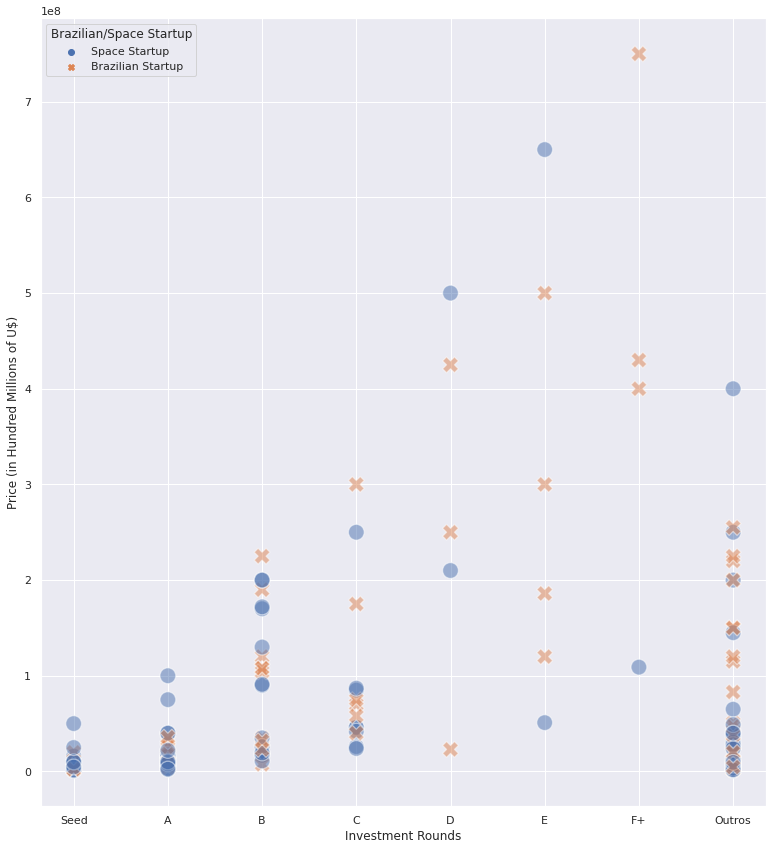

In [ ]:
sns.set_theme()
plt.figure(figsize=(13,14.5))
sns.scatterplot(x=scatter_plot_dataframe['Rodada de Investimento'], 
                y=scatter_plot_dataframe['Valor'],
                hue=scatter_plot_dataframe['Brazilian/Space Startup'],
                style=scatter_plot_dataframe['Brazilian/Space Startup'],
                s=250,
                alpha=0.5)
plt.xlabel("Investment Rounds")
plt.ylabel("Price (in Hundred Millions of U$)")
plt.title('')
#plt.savefig('Scatter_Plot_das_Rodadas_de_Investimento_em_Startups_Brasileiras_e_Espaciais.png', bbox_inches='tight')

plt.show()

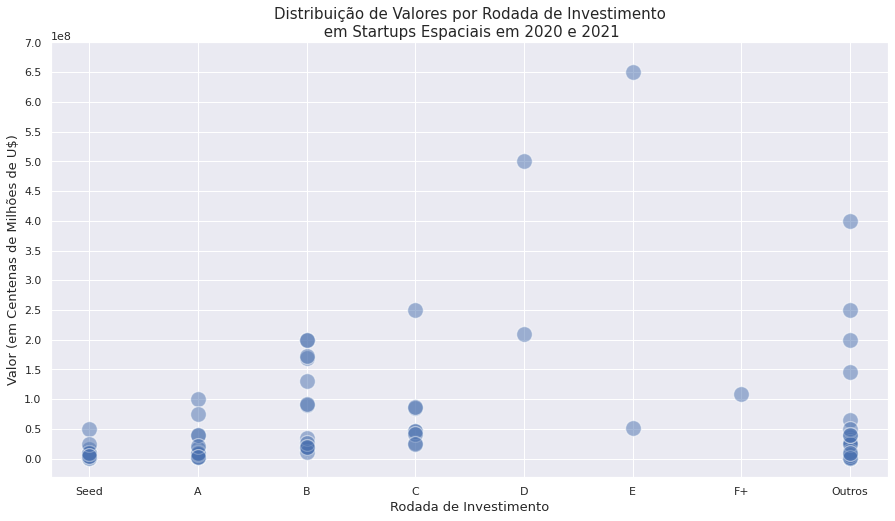

In [ ]:
space_startups = scatter_plot_dataframe[scatter_plot_dataframe['Brazilian/Space Startup'] == 'Space Startup']
plt.figure(figsize=(15,8))
sns.scatterplot(x=space_startups['Rodada de Investimento'], 
                y=space_startups['Valor'],
                s=250,
                alpha=0.5)
plt.xlabel("Rodada de Investimento", fontsize=13)
plt.ylabel("Valor (em Centenas de Milhões de U$)", fontsize=13)
plt.title('Distribuição de Valores por Rodada de Investimento\n em Startups Espaciais em 2020 e 2021', fontsize=15)
plt.yticks([(0.5*i)*(10**8) for i in range(15)])
#plt.savefig('scatter_plot_rodadas_investimento_startup_espaciais.png', bbox_inches='tight')
plt.show()

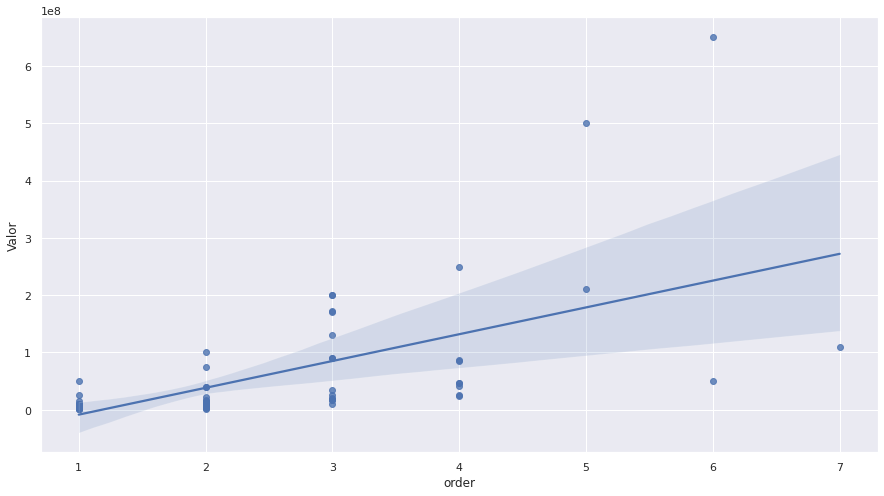

In [ ]:
space_startups = space_startups.astype({'order':'float64'}, copy=False)
space_startups_sem_outros = space_startups[space_startups['order'] != 8]
plt.figure(figsize=(15,8))
ax1 = sns.regplot(x='order', y='Valor', data=space_startups_sem_outros)

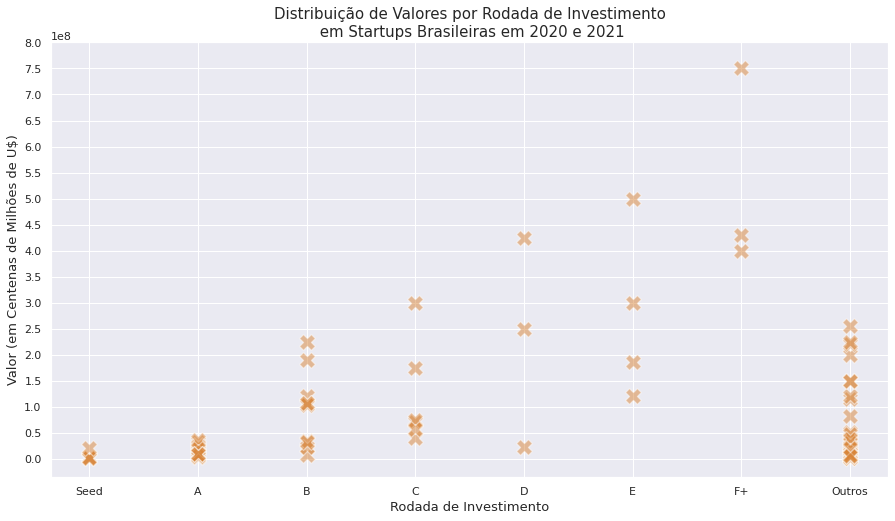

In [ ]:
brazil_startups = scatter_plot_dataframe[scatter_plot_dataframe['Brazilian/Space Startup'] == 'Brazilian Startup']
brazil_startups = brazil_startups.astype({'order':'float64'}, copy=False)
plt.figure(figsize=(15,8))
sns.scatterplot(x=brazil_startups['Rodada de Investimento'], 
                y=brazil_startups['Valor'],
                s=250,
                alpha=0.5,
                color='#d9863a',
                marker='X')
plt.xlabel("Rodada de Investimento", fontsize=13)
plt.ylabel("Valor (em Centenas de Milhões de U$)", fontsize=13)
plt.title('Distribuição de Valores por Rodada de Investimento\n em Startups Brasileiras em 2020 e 2021', fontsize=15)
plt.yticks([(0.5*i)*(10**8) for i in range(17)])
#plt.savefig('scatter_plot_rodadas_investimento_startup_brasileiras.png', bbox_inches='tight')
plt.show()

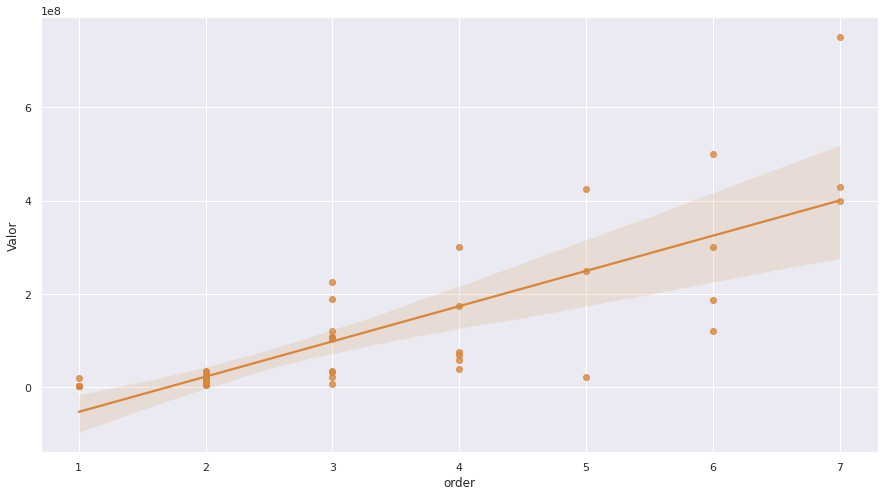

In [ ]:
brazil_startups_sem_outros = brazil_startups[brazil_startups['order'] != 8]
plt.figure(figsize=(15,8))
ax2 = sns.regplot(x='order', y='Valor', data=brazil_startups_sem_outros, color='#d9863a')

([<matplotlib.axis.YTick at 0x7f68c26bb410>,
 <a list of 15 Text major ticklabel objects>)

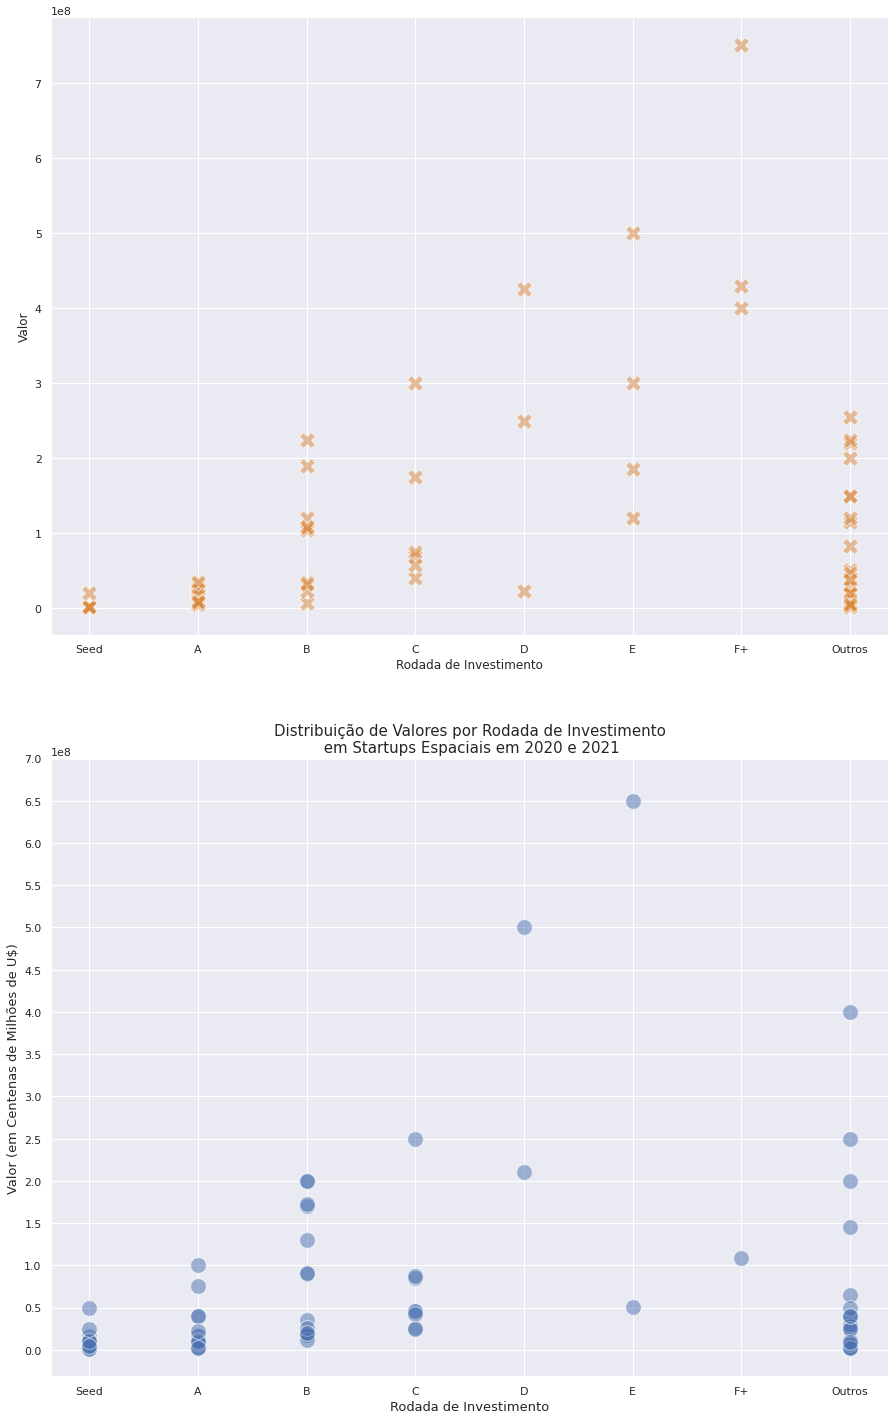

In [ ]:
#plotting both scatters together
fig, axes = plt.subplots(2,1, figsize=(15,25))

sns.scatterplot(ax=axes[0],
                x=brazil_startups['Rodada de Investimento'], 
                y=brazil_startups['Valor'],
                s=250,
                alpha=0.5,
                color='#d9863a',
                marker='X')
plt.xlabel("Rodada de Investimento", fontsize=13)
plt.ylabel("Valor (em Centenas de Milhões de U$)", fontsize=13)
plt.title('Distribuição de Valores por Rodada de Investimento\n em Startups Brasileiras em 2020 e 2021', fontsize=15)
plt.yticks([(0.5*i)*(10**8) for i in range(17)])

sns.scatterplot(ax=axes[1],
                x=space_startups['Rodada de Investimento'], 
                y=space_startups['Valor'],
                s=250,
                alpha=0.5)
plt.xlabel("Rodada de Investimento", fontsize=13)
plt.ylabel("Valor (em Centenas de Milhões de U$)", fontsize=13)
plt.title('Distribuição de Valores por Rodada de Investimento\n em Startups Espaciais em 2020 e 2021', fontsize=15)
plt.yticks([(0.5*i)*(10**8) for i in range(15)])

In [ ]:
scatter_plot_dataframe = scatter_plot_dataframe.astype({'order':'float64'}, copy=False)
scatter_plot_dataframe_sem_outros = scatter_plot_dataframe[scatter_plot_dataframe['order'] != 8]

<Figure size 1080x576 with 0 Axes>

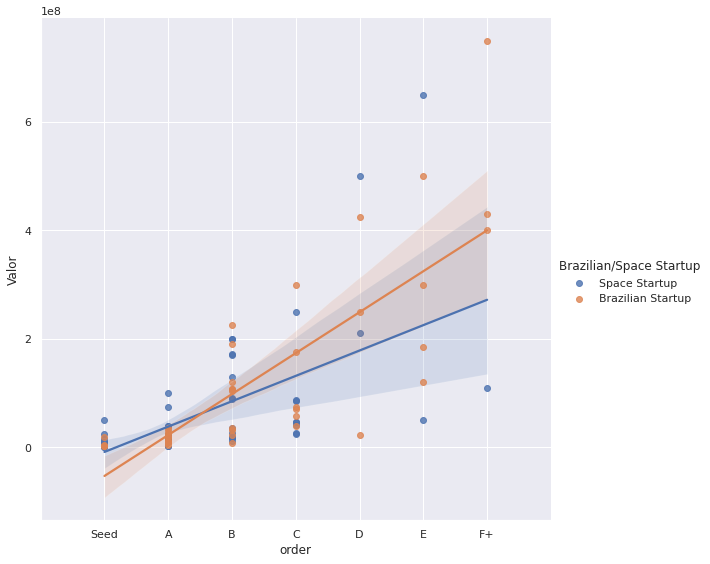

In [ ]:
plt.figure(figsize=(15,8))
sns.lmplot(x='order', y='Valor', data=scatter_plot_dataframe_sem_outros, hue='Brazilian/Space Startup', height=8).set_xticklabels(['','Seed','A', 'B', 'C','D','E', 'F+'])
#plt.xticks(labels=['Seed','A', 'B', 'C','D','E', 'F+'])

## Barplot dos Investimentos de Interesse

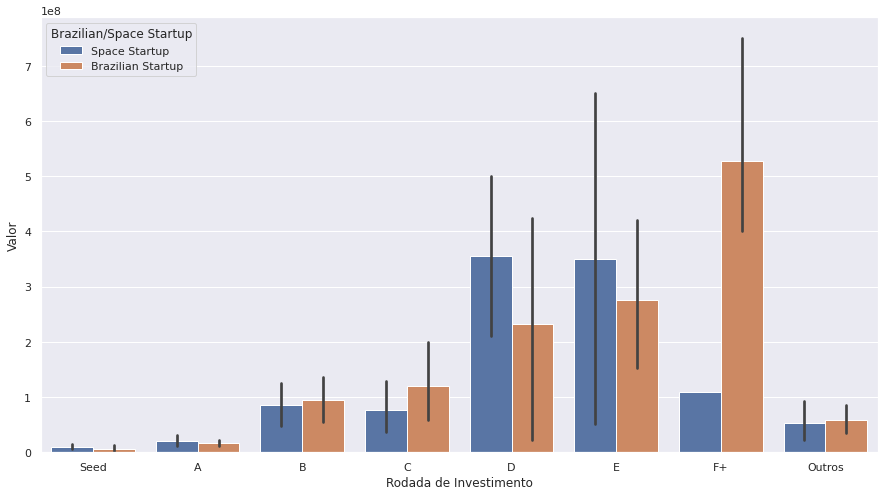

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='Rodada de Investimento', y='Valor', data=scatter_plot_dataframe, hue='Brazilian/Space Startup')

## Estatísticas de Investimento no setor Espacial

In [ ]:
space_startups = scatter_plot_dataframe[scatter_plot_dataframe['Brazilian/Space Startup'] == 'Space Startup']

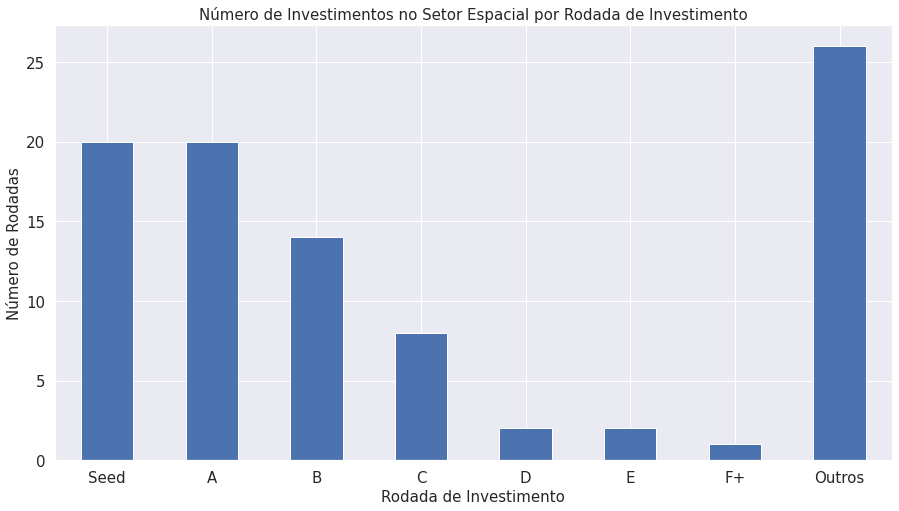

In [ ]:
space_startups['Rodada de Investimento'].value_counts().reindex(['Seed','A', 'B', 'C', 'D', 'E', 'F+', 'Outros']).plot(kind='bar', figsize=(15,8), fontsize=15, rot=0)
plt.title('Número de Investimentos no Setor Espacial por Rodada de Investimento',fontsize=15)
plt.xlabel('Rodada de Investimento', fontsize=15)
plt.ylabel('Número de Rodadas', fontsize=15)
#plt.savefig('número_investimentos_setor_espacial_por_rodada_de_investimento.png', bbox_inch='tight')
plt.show()

In [ ]:
space_startups[space_startups['Rodada de Investimento'] == 'Seed']['Valor'].describe()

count    2.000000e+01
mean     9.255000e+06
std      1.114656e+07
min      1.000000e+06
25%      3.300000e+06
50%      5.500000e+06
75%      1.000000e+07
max      5.000000e+07
Name: Valor, dtype: float64

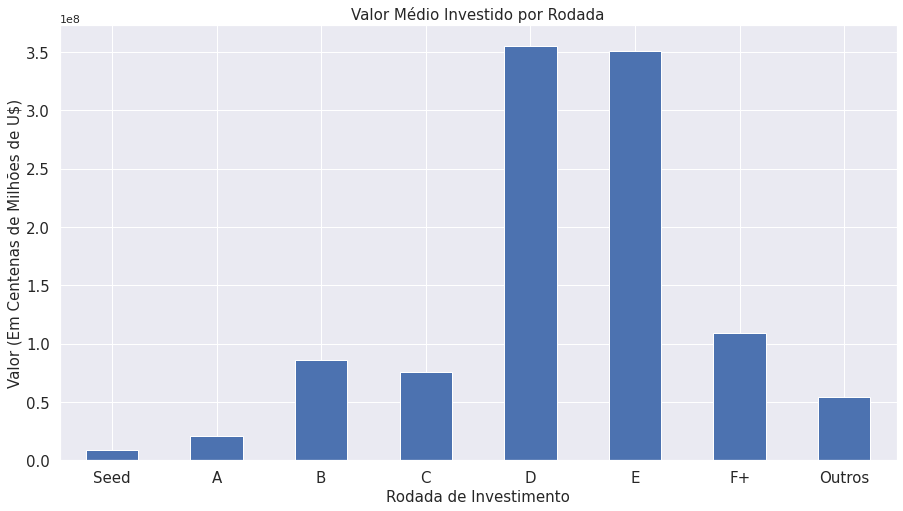

In [ ]:
space_startups.groupby('Rodada de Investimento')['Valor'].mean().reindex(['Seed','A', 'B', 'C', 'D', 'E', 'F+', 'Outros']).plot(kind='bar', figsize=(15,8), fontsize=15, rot=0)
plt.title('Valor Médio Investido por Rodada',fontsize=15)
plt.xlabel('Rodada de Investimento', fontsize=15)
plt.ylabel('Valor (Em Centenas de Milhões de U$)', fontsize=15)
#plt.savefig('valor_médio_por_rodada_de_investimento.png', bbox_inch='tight')
plt.show()

In [ ]:
space_deals['Sede (Estado-US/País)'].value_counts()

Calif.               20
U.K.                  8
CA                    8
Japan                 5
Germany               4
India                 3
FL                    3
Australia             3
Texas                 3
China                 3
GA                    2
Canada                2
Mass.                 2
N.Y.                  2
U.S.                  2
Wash.                 2
Colo.                 2
Ariz.                 2
Finland               2
Fla.                  2
Mich.                 1
D.C.                  1
Okla.                 1
Ga.                   1
Indiana               1
Italy                 1
Netherlands           1
MA                    1
Austin/El Segundo     1
Denmark               1
Singapore             1
Cyrpus                1
Va.                   1
Name: Sede (Estado-US/País), dtype: int64

In [ ]:
deals_by_countries = pd.Series(0, index=space_deals['Sede (Estado-US/País)'].unique())
USA = ['Calif.', 'CA', 'FL', 'Texas', 'GA', 'Mass.', 'N.Y.', 'U.S.', 'Wash.', 'Colo.','Ariz.','Fla.', 'Mich.', 'D.C.', 'Okla.', 'Ga.', 'Indiana', 'MA', 'Austin/El Segundo', 'Va.']
USA_deals = pd.Series({'USA':0})
for location in deals_by_countries.index:
  if location in USA:
    USA_deals['USA'] += space_deals['Sede (Estado-US/País)'].value_counts()[location]
  else:
    deals_by_countries[location] += space_deals['Sede (Estado-US/País)'].value_counts()[location]
deals_by_countries = deals_by_countries.loc[deals_by_countries != 0]
deals_by_countries = pd.concat([deals_by_countries,USA_deals], ignore_index=False)
deals_by_countries =  deals_by_countries.sort_values(ascending=False)

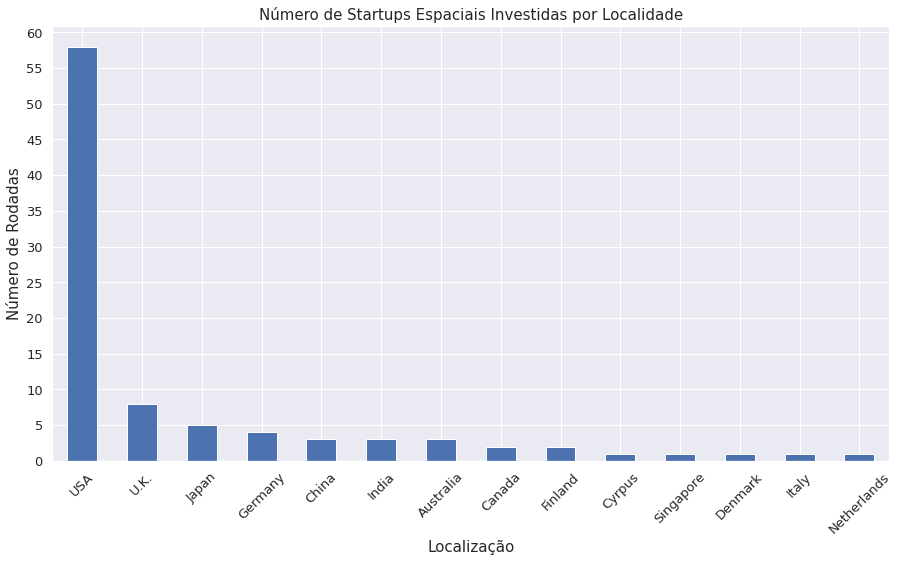

In [ ]:
deals_by_countries.plot(kind='bar', figsize=(15,8), rot=45, yticks=[i*5 for i in range(13)], fontsize=13)
plt.title('Número de Startups Espaciais Investidas por Localidade',fontsize=15)
plt.xlabel('Localização', fontsize=15)
plt.ylabel('Número de Rodadas', fontsize=15)
#plt.savefig('número_de_rodadas_espaciais_por_localidade.png', bbox_inch='tight')
plt.show()

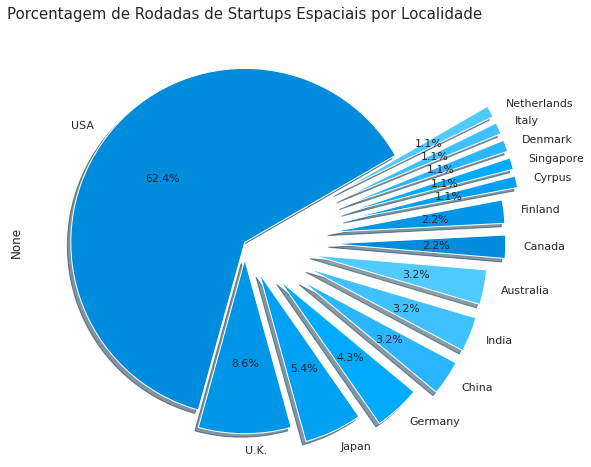

In [ ]:
plt.title('Porcentagem de Rodadas de Startups Espaciais por Localidade',fontsize=15)
deals_by_countries.plot.pie(figsize=(15,8),fontsize=11, explode=[0,0.1,0.2,0.3,0.4,0.4,0.4,0.5,0.5,0.6,0.6,0.6,0.6,0.6], startangle=30, autopct='%1.1f%%', shadow=True, colors=['#008cdc', '#0096e7', '#00a1f3', '#00abfe', '#2ab5ff', '#3fc0ff', '#51cbff'])
#plt.xlabel('Localização', fontsize=15)
#plt.ylabel('Número de Rodadas', fontsize=15)
#plt.savefig('pizza_porcentagem_de_rodadas_espaciais_por_localidade.png', bbox_inch='tight')
plt.show()

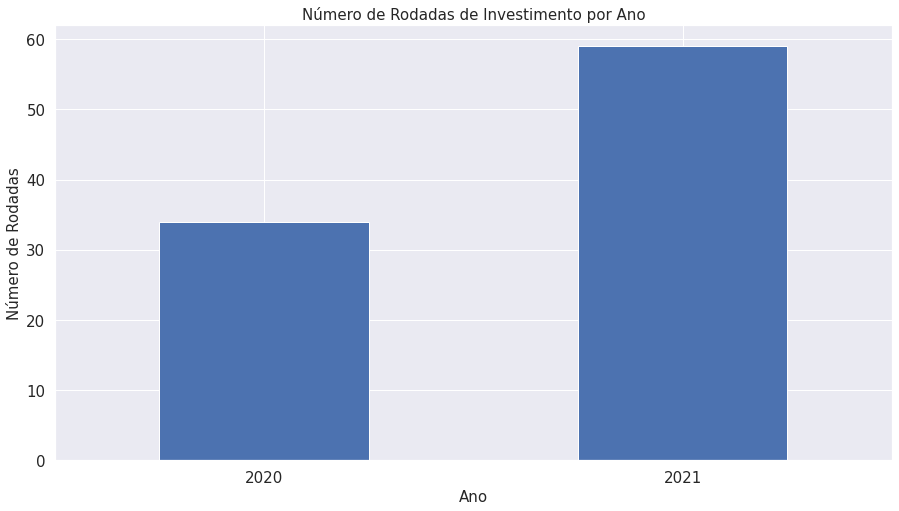

In [ ]:
space_deals.groupby(['Ano']).count()['Empresa'].plot(kind='bar', figsize=(15,8), rot=0, fontsize=15)
plt.title('Número de Rodadas de Investimento por Ano',fontsize=15)
plt.xlabel('Ano', fontsize=15)
plt.ylabel('Número de Rodadas', fontsize=15)
#plt.savefig('número_rodada_de_investimento_espacial_por_ano.png')
plt.show()

In [ ]:
#space_deals.groupby(['Ano']).sum()['Valor'].plot(kind='bar', figsize=(15,8), rot=0, fontsize=15)

## Estatísticas de Investimento em Startups Brasileiras

In [ ]:
brazil_startups = scatter_plot_dataframe[scatter_plot_dataframe['Brazilian/Space Startup'] == 'Brazilian Startup']

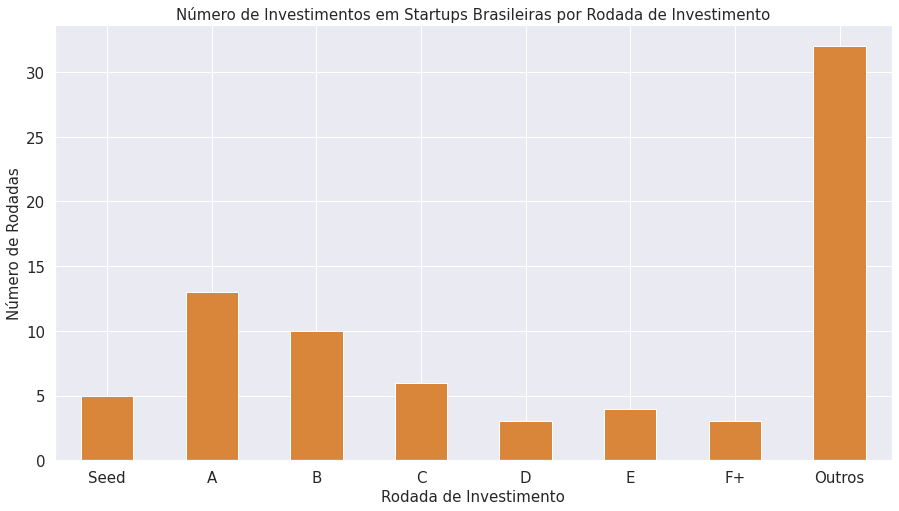

In [ ]:
brazil_startups['Rodada de Investimento'].value_counts().reindex(['Seed','A', 'B', 'C', 'D', 'E', 'F+', 'Outros']).plot(kind='bar', figsize=(15,8), fontsize=15, rot=0, color='#d9863a')
plt.title('Número de Investimentos em Startups Brasileiras por Rodada de Investimento',fontsize=15)
plt.xlabel('Rodada de Investimento', fontsize=15)
plt.ylabel('Número de Rodadas', fontsize=15)
#plt.savefig('número_investimentos_setor_brazil_por_rodada_de_investimento.png', bbox_inch='tight')
plt.show()

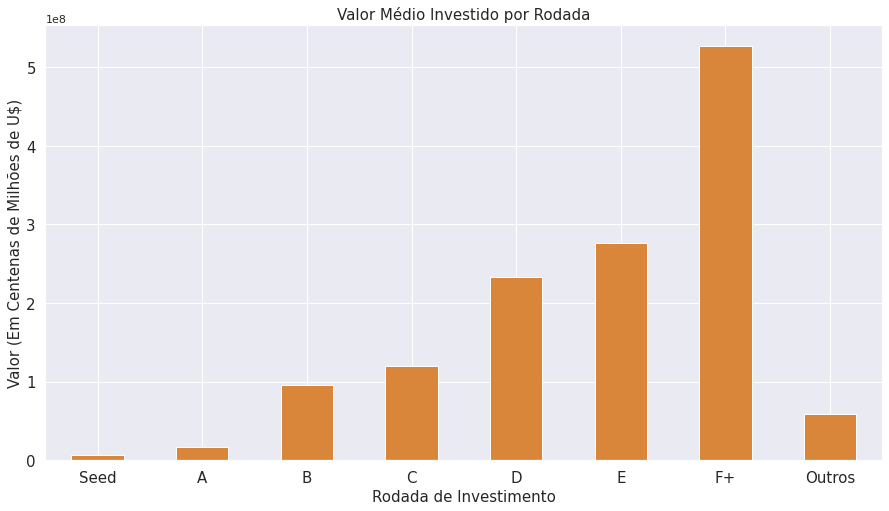

In [ ]:
brazil_startups.groupby('Rodada de Investimento')['Valor'].mean().reindex(['Seed','A', 'B', 'C', 'D', 'E', 'F+', 'Outros']).plot(kind='bar', figsize=(15,8), fontsize=15, rot=0, color='#d9863a')
plt.title('Valor Médio Investido por Rodada',fontsize=15)
plt.xlabel('Rodada de Investimento', fontsize=15)
plt.ylabel('Valor (Em Centenas de Milhões de U$)', fontsize=15)
#plt.savefig('valor_médio_por_rodada_de_investimento_startup_brasileira.png', bbox_inch='tight')
plt.show()

In [ ]:
brazilian_startup_deals.groupby(['Ano']).count()

,Investidores,Valor,Rodada de Investimento,Empresa,Sede (Cidade),Sede (Estado-US/País),Setor,Sobre a Empresa,Mês
Ano,,,,,,,,,
2020,29,29,29,29,12,29,29,29,29
2021,47,47,47,47,22,47,47,47,47


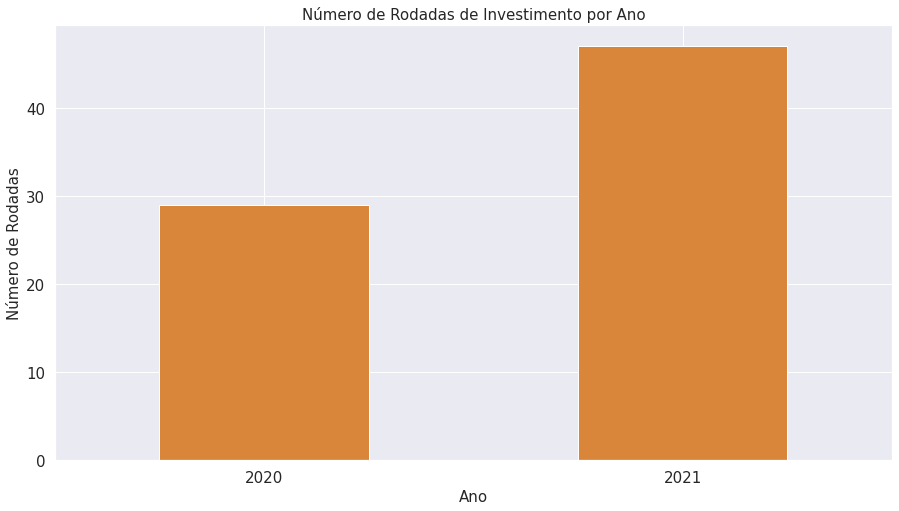

In [ ]:
brazilian_startup_deals.groupby(['Ano']).count()['Empresa'].plot(kind='bar', figsize=(15,8), rot=0, fontsize=15, color='#d9863a')
plt.title('Número de Rodadas de Investimento por Ano',fontsize=15)
plt.xlabel('Ano', fontsize=15)
plt.ylabel('Número de Rodadas', fontsize=15)
#plt.savefig('número_rodada_de_investimento_por_ano_startup_brasileira.png', bbox_inch='tight')
plt.show()

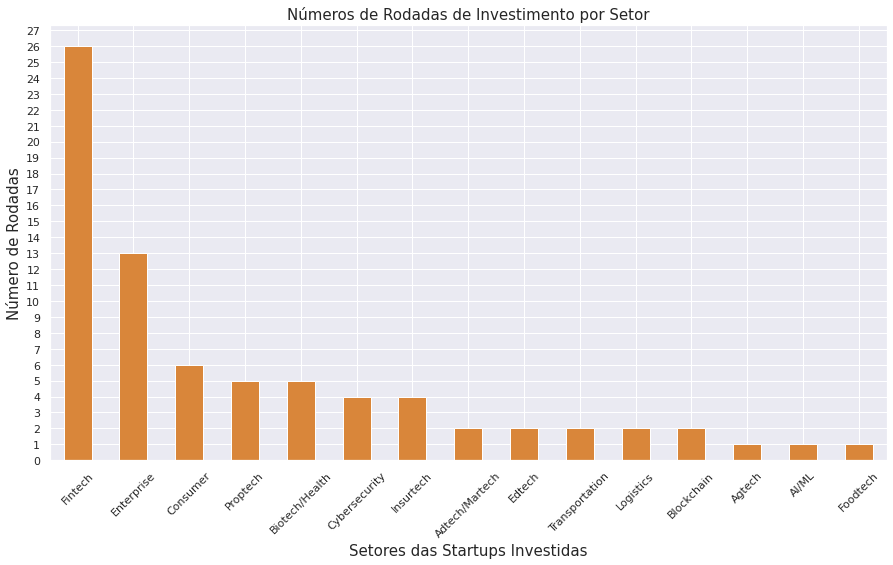

In [ ]:
brazilian_startup_deals['Setor'].value_counts().plot(kind='bar', figsize=(15,8), rot=45, color='#d9863a')
plt.title('Números de Rodadas de Investimento por Setor',fontsize=15)
plt.xlabel('Setores das Startups Investidas', fontsize=15)
plt.ylabel('Número de Rodadas', fontsize=15)
plt.yticks([i for i in range(28)])
#plt.savefig('número_rodada_de_investimento_por_setor_startup_brasileira.png', bbox_inch='tight')
plt.show()

## Investimento Médios ao longo do tempo

In [ ]:
space_deals_2020 = space_deals[space_deals['Ano'] == 2020]
space_deals_por_mes_2020 = space_deals_2020.groupby('Mês')['Valor'].mean()
space_deals_por_mes_2020 = pd.concat([space_deals_por_mes_2020, pd.Series(0,index=['Junho'])])
space_deals_por_mes_2020 = space_deals_por_mes_2020.reindex(['Janeiro','Fevereiro','Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
space_deals_por_mes_2020.index = ['Janeiro 2020','Fevereiro 2020','Março 2020', 'Abril 2020', 'Maio 2020', 'Junho 2020', 'Julho 2020', 'Agosto 2020', 'Setembro 2020', 'Outubro 2020', 'Novembro 2020', 'Dezembro 2020']
space_deals_por_mes_2020

space_deals_2021 = space_deals[space_deals['Ano'] == 2021]
space_deals_por_mes_2021 = space_deals_2021.groupby('Mês')['Valor'].mean()
space_deals_por_mes_2021 = space_deals_por_mes_2021.reindex(['Janeiro','Fevereiro','Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
space_deals_por_mes_2021.index = ['Janeiro 2021','Fevereiro 2021','Março 2021', 'Abril 2021', 'Maio 2021', 'Junho 2021', 'Julho 2021', 'Agosto 2021', 'Setembro 2021', 'Outubro 2021', 'Novembro 2021', 'Dezembro 2021']
space_deals_por_mes_2021

space_deals_por_mes = pd.concat([space_deals_por_mes_2020, space_deals_por_mes_2021])

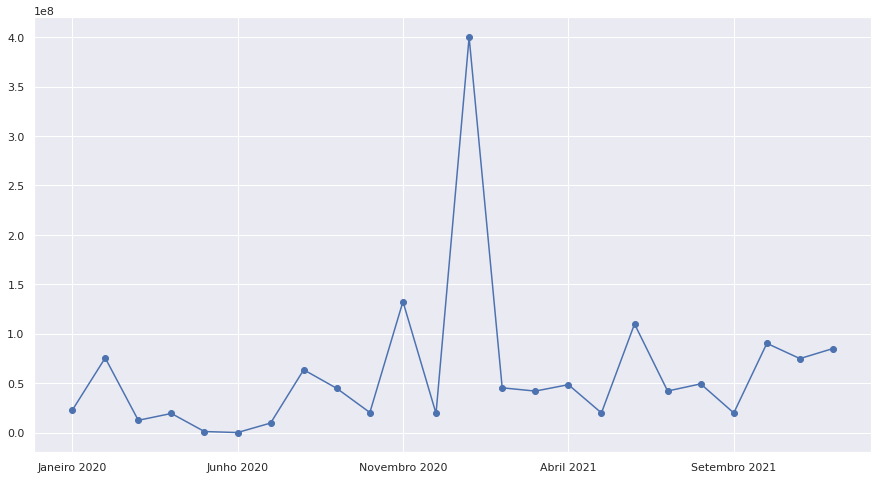

In [ ]:
plt.figure(figsize=(15,8))
ax1 = space_deals_por_mes.plot(marker='o')

In [ ]:
brazil_deals_2020 = brazilian_startup_deals[brazilian_startup_deals['Ano'] == 2020]
brazil_deals_2020_por_mes = pd.concat([brazil_deals_2020.groupby('Mês')['Valor'].mean(), pd.Series(0, index=['Abril'])])
brazil_deals_2020_por_mes = brazil_deals_2020_por_mes.reindex(['Janeiro','Fevereiro','Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
brazil_deals_2020_por_mes.index = ['Janeiro 2020','Fevereiro 2020','Março 2020', 'Abril 2020', 'Maio 2020', 'Junho 2020', 'Julho 2020', 'Agosto 2020', 'Setembro 2020', 'Outubro 2020', 'Novembro 2020', 'Dezembro 2020']
#brazil_deals_2020_por_mes.plot(marker='o', color='#d9863a')

brazil_deals_2021 = brazilian_startup_deals[brazilian_startup_deals['Ano'] == 2021]
brazil_deals_2021_por_mes = brazil_deals_2021.groupby('Mês')['Valor'].mean()
brazil_deals_2021_por_mes = brazil_deals_2021_por_mes.reindex(['Janeiro','Fevereiro','Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
brazil_deals_2021_por_mes.index = ['Janeiro 2021','Fevereiro 2021','Março 2021', 'Abril 2021', 'Maio 2021', 'Junho 2021', 'Julho 2021', 'Agosto 2021', 'Setembro 2021', 'Outubro 2021', 'Novembro 2021', 'Dezembro 2021']
#brazil_deals_2021_por_mes.plot(marker='o', color='#d9863a')

brazil_deals_por_mes = pd.concat([brazil_deals_2020_por_mes, brazil_deals_2021_por_mes])

In [ ]:
space_and_brazilian_avg_por_mes = space_deals_por_mes.to_frame()
space_and_brazilian_avg_por_mes = pd.concat([space_and_brazilian_avg_por_mes, brazil_deals_por_mes], axis=1, ignore_index=True)
space_and_brazilian_avg_por_mes.columns = ['Startups Espaciais', 'Startups Brasileiras']

In [ ]:
space_and_brazilian_avg_por_mes

,Startups Espaciais,Startups Brasileiras
Janeiro 2020,2.233333e+07,6.076667e+07
Fevereiro 2020,7.550000e+07,4.000000e+07
Março 2020,1.236667e+07,7.233333e+06
Abril 2020,1.930000e+07,0.000000e+00
Maio 2020,1.000000e+06,6.800000e+06
Junho 2020,0.000000e+00,1.777500e+07
Julho 2020,9.600000e+06,4.736667e+07
Agosto 2020,6.350000e+07,5.000000e+06
Setembro 2020,4.468500e+07,1.386250e+08
Outubro 2020,2.025000e+07,4.666667e+07


In [ ]:
#Contagem nº de deals por mês no espacial

space_deals_por_mes_2020_contagem = pd.concat([space_deals_2020.groupby('Mês')['Valor'].count(), pd.Series(0,index=['Junho'])])
space_deals_por_mes_2020_contagem = space_deals_por_mes_2020_contagem.reindex(['Janeiro','Fevereiro','Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
space_deals_por_mes_2020_contagem.index = ['Janeiro 2020','Fevereiro 2020','Março 2020', 'Abril 2020', 'Maio 2020', 'Junho 2020', 'Julho 2020', 'Agosto 2020', 'Setembro 2020', 'Outubro 2020', 'Novembro 2020', 'Dezembro 2020']

space_deals_por_mes_2021_contagem = space_deals_2021.groupby('Mês')['Valor'].count()
space_deals_por_mes_2021_contagem = space_deals_por_mes_2021_contagem.reindex(['Janeiro','Fevereiro','Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
space_deals_por_mes_2021_contagem.index = ['Janeiro 2021','Fevereiro 2021','Março 2021', 'Abril 2021', 'Maio 2021', 'Junho 2021', 'Julho 2021', 'Agosto 2021', 'Setembro 2021', 'Outubro 2021', 'Novembro 2021', 'Dezembro 2021']

space_deals_count = pd.concat([space_deals_por_mes_2020_contagem, space_deals_por_mes_2021_contagem])

space_and_brazilian_avg_por_mes = pd.concat([space_and_brazilian_avg_por_mes, space_deals_count], axis=1)

In [ ]:
#Contagem nº de deals por mês no brasil

brazil_deals_por_mes_2020_contagem = pd.concat([brazil_deals_2020.groupby('Mês')['Valor'].count(), pd.Series(0,index=['Abril'])])
brazil_deals_por_mes_2020_contagem = brazil_deals_por_mes_2020_contagem.reindex(['Janeiro','Fevereiro','Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
brazil_deals_por_mes_2020_contagem.index = ['Janeiro 2020','Fevereiro 2020','Março 2020', 'Abril 2020', 'Maio 2020', 'Junho 2020', 'Julho 2020', 'Agosto 2020', 'Setembro 2020', 'Outubro 2020', 'Novembro 2020', 'Dezembro 2020']

brazil_deals_por_mes_2021_contagem = brazil_deals_2021.groupby('Mês')['Valor'].count()
brazil_deals_por_mes_2021_contagem = brazil_deals_por_mes_2021_contagem.reindex(['Janeiro','Fevereiro','Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
brazil_deals_por_mes_2021_contagem.index = ['Janeiro 2021','Fevereiro 2021','Março 2021', 'Abril 2021', 'Maio 2021', 'Junho 2021', 'Julho 2021', 'Agosto 2021', 'Setembro 2021', 'Outubro 2021', 'Novembro 2021', 'Dezembro 2021']

brazil_deals_count = pd.concat([brazil_deals_por_mes_2020_contagem, brazil_deals_por_mes_2021_contagem])

space_and_brazilian_avg_por_mes = pd.concat([space_and_brazilian_avg_por_mes, brazil_deals_count], axis=1)

In [ ]:
space_and_brazilian_avg_por_mes.columns = ['Startups Espaciais', 'Startups Brasileiras', 'Nº Rodadas de Startups Espaciais', 'Nº de Rodadas de Startups Brasileiras']
space_and_brazilian_avg_por_mes

,Startups Espaciais,Startups Brasileiras,Nº Rodadas de Startups Espaciais,Nº de Rodadas de Startups Brasileiras
Janeiro 2020,2.233333e+07,6.076667e+07,3,3
Fevereiro 2020,7.550000e+07,4.000000e+07,4,1
Março 2020,1.236667e+07,7.233333e+06,3,3
Abril 2020,1.930000e+07,0.000000e+00,1,0
Maio 2020,1.000000e+06,6.800000e+06,1,1
Junho 2020,0.000000e+00,1.777500e+07,0,4
Julho 2020,9.600000e+06,4.736667e+07,1,3
Agosto 2020,6.350000e+07,5.000000e+06,4,1
Setembro 2020,4.468500e+07,1.386250e+08,2,4
Outubro 2020,2.025000e+07,4.666667e+07,4,3


In [ ]:
for i, valor in space_and_brazilian_avg_por_mes.iterrows():
  print(int(valor['Nº Rodadas de Startups Espaciais']))
  break

3


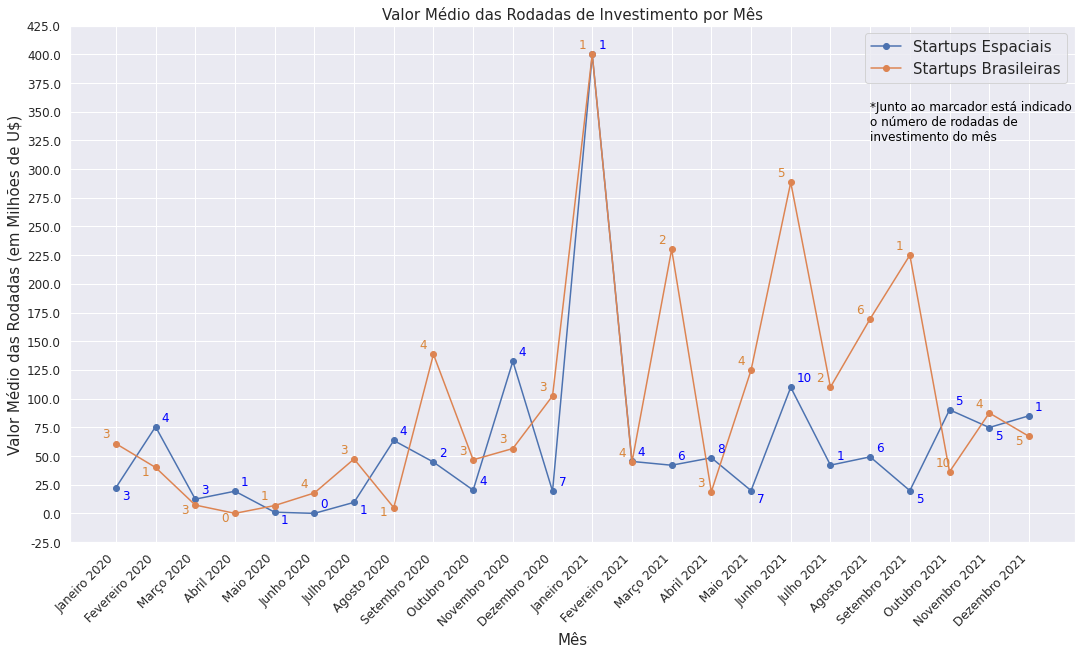

In [ ]:
space_and_brazilian_avg_por_mes[['Startups Espaciais', 'Startups Brasileiras']].plot(figsize=(18,9.5), marker='o', rot=45, fontsize=12)
plt.xticks(range(len(space_and_brazilian_avg_por_mes.index)), space_and_brazilian_avg_por_mes.index, horizontalalignment='right')
plt.yticks([(i*0.25)*(10**8) for i in range(-1,18)], [(i*0.25)*(100) for i in range(-1,18)])
plt.legend(fontsize=15)
plt.ylabel('Valor Médio das Rodadas (em Milhões de U$)', fontsize=15)
plt.xlabel('Mês', fontsize=15)
plt.title('Valor Médio das Rodadas de Investimento por Mês', fontsize=15)
a = 0
for i, valor in space_and_brazilian_avg_por_mes.iterrows():
  if a in [0,4,6,16,20,22]:
    plt.text(x=a+0.15, y=valor['Startups Espaciais']-(0.1)*(10**8), s=int(valor['Nº Rodadas de Startups Espaciais']), color='blue', fontsize=12)
    a+=1
    continue
  plt.text(x=a+0.15, y=valor['Startups Espaciais']+(0.05)*(10**8), s=int(valor['Nº Rodadas de Startups Espaciais']), color='blue', fontsize=12)
  a+=1
a = 0
for i, valor in space_and_brazilian_avg_por_mes.iterrows():
  if a in [1,2,3,7,23]:
    plt.text(x=a-0.35, y=valor['Startups Brasileiras']-(0.07)*(10**8), s=int(valor['Nº de Rodadas de Startups Brasileiras']), color='#d9863a', fontsize=12)
    a+=1
    continue
  plt.text(x=a-0.35, y=valor['Startups Brasileiras']+(0.05)*(10**8), s=int(valor['Nº de Rodadas de Startups Brasileiras']), color='#d9863a', fontsize=12)
  a+=1
plt.text(x=19,y=3.25*(10**8),s='*Junto ao marcador está indicado \no número de rodadas de \ninvestimento do mês', color='black')
plt.savefig('Valor Médio das Rodadas de Investimento por Mês.png', bbox_inches='tight')
plt.show()

# Perfil dos Investidores

In [ ]:
def locationInvestmentRank(investor_list):
  USA = ['Calif.', 'CA', 'FL', 'Texas', 'GA', 'Mass.', 'N.Y.', 'U.S.', 'Wash.', 'Colo.','Ariz.','Fla.', 'Mich.', 'D.C.', 'Okla.', 'Ga.', 'Indiana', 'MA', 
         'Austin/El Segundo', 'Va.', 'UT', 'NY', 'WA', 'PA', 'IL', 'Utah', 'Idaho', 'OR', 'New York N.Y.', 'Tenn.', 'Pa.', 'Md.', 'San Mateo', 'US', 'Ill.',
         'Massachusetts', 'CO', 'Wa.', 'TX', 'MI', 'New York. N.Y.', 'Columbia','N.J.', 'NJ', 'MD', 'OH', 'Ore.', 'Neb.', 'Conn.', 'R.I.', 'USA', 'Kan.', 'N.C.',
         'Connecticut, United States, North America', 'AZ', 'NC', 'California']
  USA_deals = pd.Series({'USA':0})
  investor_locations = pd.Series(0,index=InvestorFilterBoosted(deals,'Investidores',investor_list)['Sede (Estado-US/País)'].unique())

  for location in InvestorFilterBoosted(deals,'Investidores',investor_list)['Sede (Estado-US/País)'].value_counts().index:
    if location in USA:
      USA_deals['USA'] += InvestorFilterBoosted(deals,'Investidores',investor_list)['Sede (Estado-US/País)'].value_counts()[location]
      continue
    investor_locations[location] = InvestorFilterBoosted(deals,'Investidores',investor_list)['Sede (Estado-US/País)'].value_counts()[location]
  investor_locations = pd.concat([investor_locations, USA_deals])

  return investor_locations[investor_locations != 0].sort_values(ascending=False)

In [ ]:
locationInvestmentRank(['blackrock'])

USA                  56
U.K.                  7
Germany               4
France                2
Singapore             2
Australia             1
Sweden                1
Brazil                1
UK                    1
Spain                 1
Rehovot/San Diego     1
Hong Kong             1
dtype: int64

## Visualização do Investimento Médio por Rodada dos Investidores

In [ ]:
def adjustingRoundLabels(dataframe):
  round_angel = ['Angel', 'Angel/Seed']
  round_seed = ['A/Seed','Seed/A','Pre-Seed','Pre-Seed/Seed','Pre-seed','Post-Seed','Seed','Seed Extension','Seed II','Seed+','Seed-2','Seed-Extension','Seed/A','Seed/Debt','Seed/Pre-Seed','Seeed','in two seed rounds']
  round_a = ['a','A','A+','A++','A-1','A-2','A-3','A-Extension','A/B','A/Debt','A1','A2','A3', 'Debt/A', 'Prea-A', 'Pre-A', 'Series A']
  round_b = ['B','B+','B-1','B-2','B-Extension','B/C','B/Debt','B1','B2','BB', 'Debt/B', 'Pre-B', 'Series B']
  round_c = ['C','C+','C-1','C-Extension','C/Debt','C1','C2', 'Debt & C', 'Pre-C', 'Series C', 'over two C rounds']
  round_d = ['D','D+','D+/E','D-2','D-Extension','D/Bridge','D/Debt','D/Equity','D/Pre-IPO','D1','D2', 'Series D']
  round_e = ['E','E+','E-Extensionn','E/Debt','E2','Series E']
  round_f_or_more = ['F','G','G-Extension','G-extension','G/Debt','Growth Financing','H','I','J', 'Pre-IPO', 'Series F']
  dataframe.loc[[True if round in round_seed else False for round in dataframe['Rodada de Investimento']],'Rodada de Investimento'] = 'Seed'
  dataframe.loc[[True if round in round_a else False for round in dataframe['Rodada de Investimento']],'Rodada de Investimento'] = 'A'
  dataframe.loc[[True if round in round_b else False for round in dataframe['Rodada de Investimento']],'Rodada de Investimento'] = 'B'
  dataframe.loc[[True if round in round_c else False for round in dataframe['Rodada de Investimento']],'Rodada de Investimento'] = 'C'
  dataframe.loc[[True if round in round_d else False for round in dataframe['Rodada de Investimento']],'Rodada de Investimento'] = 'D'
  dataframe.loc[[True if round in round_e else False for round in dataframe['Rodada de Investimento']],'Rodada de Investimento'] = 'E'
  dataframe.loc[[True if round in round_f_or_more else False for round in dataframe['Rodada de Investimento']],'Rodada de Investimento'] = 'F+'
  return dataframe

In [ ]:
def investorsMeanInvestmentperRound(investors_list_of_lists):
  mean_investment_per_round = pd.DataFrame(list(adjustingRoundLabels(deals).groupby('Rodada de Investimento').mean().loc[['Seed','A','B','C','D','E','F+'],'Valor']),
                                           index=['Seed', 'A', 'B', 'C', 'D','E', 'F+'],
                                           columns=['Investimento Médio Geral'])
  for investors_list in investors_list_of_lists:
    investor_deals = InvestorFilterBoosted(deals,'Investidores',investors_list)
    investor_deals = adjustingRoundLabels(investor_deals)
    mean_investment_table = investor_deals.groupby('Rodada de Investimento').mean()
    not_existing_rounds = np.setdiff1d(np.array(['Seed','A','B','C','D','E','F+']), mean_investment_table.index)
    if len(not_existing_rounds) > 0:
      not_existing_rounds = pd.Series(0,index=not_existing_rounds)
      mean_investment_table = pd.concat([mean_investment_table,not_existing_rounds])
    mean_investment_per_round[investors_list[0]] = mean_investment_table.loc[['Seed','A','B','C','D','E','F+'],'Valor']
  return mean_investment_per_round


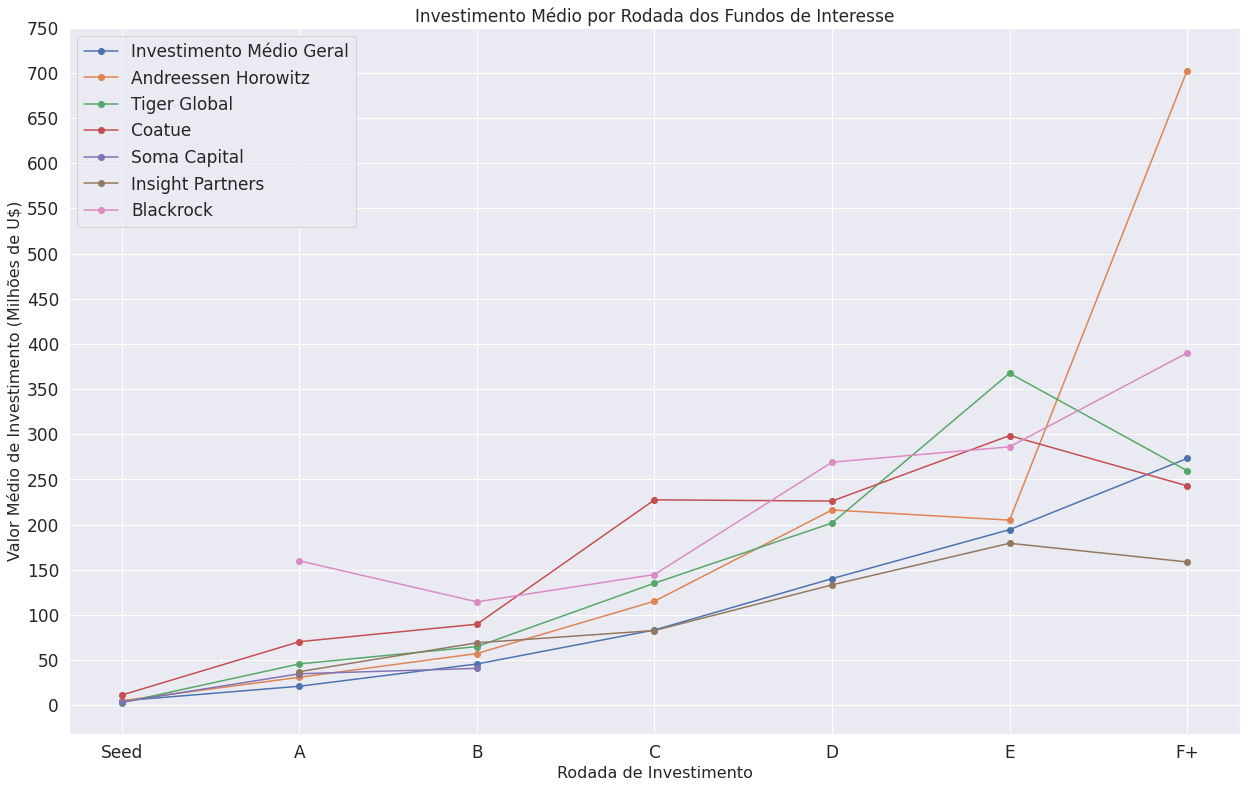

In [ ]:
investorsMeanInvestmentperRound([['Andreessen Horowitz','a16z'],['Tiger Global','Tiger'],['Coatue'],['Soma Capital', 'Soma'],['Insight Partners', 'Insight'],['Blackrock']]).plot(kind='line', figsize=(21,13), fontsize=17, marker='o')
plt.legend(fontsize=17)
plt.yticks([i*0.5*(10**8) for i in range(16)], [int((i*0.5)*(100)) for i in range(16)])
plt.ylabel('Valor Médio de Investimento (Milhões de U$)', fontsize=16)
plt.xlabel('Rodada de Investimento', fontsize=16)
plt.title('Investimento Médio por Rodada dos Fundos de Interesse', fontsize=17)
plt.savefig('investimento_médio_por_rodada_investidores_de_interesse.png', bbox_inches='tight')
plt.show()

In [ ]:
investorsMeanInvestmentperRound([['Andreessen Horowitz','a16z'],['Tiger Global','Tiger'],['Coatue'],['Soma Capital', 'Soma'],['Insight Partners', 'Insight'],['Blackrock']])

,Investimento Médio Geral,Andreessen Horowitz,Tiger Global,Coatue,Soma Capital,Insight Partners,Blackrock
Seed,5.082303e+06,5.226923e+06,3.000000e+06,1.148125e+07,3.706818e+06,NaN,NaN
A,2.122856e+07,3.110111e+07,4.589861e+07,7.050000e+07,3.500000e+07,3.735612e+07,1.600000e+08
B,4.583873e+07,5.743125e+07,6.508909e+07,8.984000e+07,4.100000e+07,6.927188e+07,1.146250e+08
C,8.345584e+07,1.152941e+08,1.352500e+08,2.274800e+08,NaN,8.285577e+07,1.448300e+08
D,1.402946e+08,2.162500e+08,2.018500e+08,2.261111e+08,NaN,1.333696e+08,2.691818e+08
E,1.944778e+08,2.050000e+08,3.675714e+08,2.985714e+08,NaN,1.794167e+08,2.861111e+08
F+,2.732621e+08,7.025000e+08,2.596667e+08,2.430000e+08,NaN,1.587500e+08,3.900000e+08


# Rascunhos

In [ ]:
investorsListBoosted(deals)

['&vest',
 '.406 Ventures',
 '01 Advisors',
 '01 Advisors Primary Venture Partners',
 '01 Advisors existing investors NEA',
 '01A',
 '021 Capital',
 '0x Labs',
 '1 Flourish',
 '100 Black Angels & Allies Fund',
 '100 Black Angels Fund',
 '100X Ventures',
 '1010 Holdings',
 '10D',
 '10D Ventures',
 '10T',
 '10T Holdings',
 '10X Capital',
 '10X Venture Partners',
 '10x Capital',
 '10x Group',
 '11.2 Capital',
 '11.2 capital',
 '116 Street Ventures',
 '120 Capital',
 '122 West',
 '122WEST',
 '122WEST Ventures',
 '1248 Holdings',
 '1330 Investments',
 '137 Ventures',
 '1414 Ventures',
 '14W',
 '14w',
 '1517',
 '1517 Fund',
 '15th Rock',
 '15th Rock Ventures',
 '166 2nd',
 '166 2nd Financial Services',
 '1776',
 '1776 Ventures',
 '1818 Venture Capital',
 '1835i Ventures',
 '1843 Capital',
 '1855 Capital',
 '19 York',
 '1930 Capital',
 '1955 Capital',
 '1982 Ventures',
 '1984',
 '1984 VC',
 '1984 Ventures',
 '1984vc',
 '1994 LLC',
 '1Confirmation',
 '1Up Ventures',
 '1inch',
 '1kx',
 '2.12 An

In [ ]:
InvestorFilterBoosted(deals,'Investidores',['Accel'])

,Investidores,Valor,Rodada de Investimento,Empresa,Sede (Cidade),Sede (Estado-US/País),Setor,Sobre a Empresa,Mês,Ano
0,"Schroder Adveq, participtation from B Capital,...",30000000.0,C,Bizongo,Mumbai,India,Enterprise,Online B2B Packaging Needs Marketplace,Janeiro,2020
1,"B Capital, Accel Partners",105000000.0,D,Bounce,Bengaluru,India,Transportation,Dockless Bikes And Scooters,Janeiro,2020
2,"Insight Partners, participation from Bain Capi...",70000000.0,E,Sysdig,San Francisco,CA,DevOps,Platform For Cloud-Native Workloads In Production,Janeiro,2020
3,"Accel, participation from Lightspeed Venture P...",75000000.0,C,Personio,NaN,Germany,Enterprise,Hr Platform,Janeiro,2020
4,"ICONIQ Capital, participation from Tiger Globa...",90000000.0,C,Zinier,San Francisco,CA,Enterprise,Field Service Automation,Janeiro,2020
...,...,...,...,...,...,...,...,...,...,...
224,"Insight Partners, participation from the Europ...",61000000.0,C,Carto,New York,N.Y.,Enterprise,Cloud Native Spatial Analysis Platform For Var...,Dezembro,2021
225,"Accel Partners, participation from Falcon Edge",8000000.0,A,FlyFin,San Jose,Calif.,Fintech,Tax Deduction Platform For Freelancers,Dezembro,2021
226,"Abu Dhabi Growth Fund, participation from Coat...",450000000.0,U,Monzo,NaN,U.K.,Fintech,Digital Bank,Dezembro,2021
227,"Dragoneer, Echo Street, Tencent, Accel, Founde...",100000000.0,C,Lydia,NaN,France,Fintech,Stock And Crypto Trading App,Dezembro,2021


In [ ]:
#all_investors_catalog = investorsCatalogBoosted(investorsListBoosted(deals))

In [ ]:
#all_investors_catalog

In [ ]:
#all_investors_catalog.to_excel('all_investors_catalog.xlsx')

In [ ]:
investorsListBoosted(keywordFilter(deals,'Sede (Estado-US/País)', ['U.K.']))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


['14W',
 '1818 Venture Capital',
 '2150',
 '24Haymarket',
 '2EnablePartners',
 '2Invest',
 '3B Future Health Fund',
 '3commas',
 '500 Start-Ups',
 '7Percent Ventures',
 '7pc Ventures',
 '7percent Ventures',
 '8-Bit Capital',
 '83 North',
 '83North',
 '88mph',
 'A Black Square',
 'A100x',
 'ABN AMRO Ventures',
 'ACF Investors',
 'ACF Investors’ Delta Fund',
 'ADV',
 'AEI HorizonX',
 'APEX Ventures',
 'Abu Dhabi Growth Fund',
 'Accel',
 'Accenture Ventures',
 'Access Entertainment',
 'Access Industries',
 'Acequia Capital',
 'Activant Capital',
 'ActivumSG',
 'Acton Capital',
 'Ada Ventures',
 'Adage Capital Management',
 'Adams Street Partners',
 'AddVenture',
 'Additio Investment Group',
 'Addition',
 'Adecco Peter',
 'Adjuvant Capital',
 'Adjuvo',
 'Adjuvo Syndicate',
 'Adnan Ebrahim',
 'Adobe',
 'Advent International',
 'AgFunder',
 'Alan Howard',
 'AlbionVC',
 'Alderley Park Ventures',
 'Alejandro Agag',
 'Alex Chesterman',
 'Alexander Nevinskiy',
 'Alexis Bonte',
 'Alibaba',
 'All 

In [ ]:
uk_space_investors = investorsListBoosted(spaceFilter(keywordFilter(deals,'Sede (Estado-US/País)', ['U\.K\.','UK'])))
uk_space_investors.remove('U')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [ ]:
spaceFilter(keywordFilter(deals,'Sede (Estado-US/País)', ['U\.K\.','UK']))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,Investidores,Valor,Rodada de Investimento,Empresa,Sede (Cidade),Sede (Estado-US/País),Setor,Sobre a Empresa,Mês,Ano
4651,"Founders Fund, participation from Luminous Ven...",1900000.0,Seed,Magdrive,NaN,U.K.,Aerospace,Spacecraft Propulsion System,Dezembro,2020
4812,"BGF, Octopus Ventures, participation from High...",24000000.0,U,Orbex,NaN,U.K.,Aerospace,Rocket Launching Platform,Dezembro,2020
5250,"SoftBank, Hughes Network Systems",400000000.0,U,OneWeb,London,U.K.,Spacetech,Broadband Satellite Operator,Janeiro,2021
6762,U,6900000.0,A,Autonomous Flight,London,U.K.,Aerospace,Electrical Vertical Takeoff And Landing Startup,Abril,2021
6827,Seraphim Capital,5000000.0,Seed,Satellite Vu,London,U.K.,Aerospace,Infrared/Emission Earth Imaging Platform,Abril,2021
7633,"Metaplanet Holdings, participation by Y Combin...",3400000.0,Seed,Alba Orbital,Glasgow,U.K.,Aerospacee,Orbital Iimagery,Maio,2021
9369,Foresight,6700000.0,U,Callen-Lenz,Salisbury,U.K.,Aerospace,Engineering Design Services For Unmanned Aeria...,Agosto,2021
10036,"Seraphim Space Investment Trust, participation...",37000000.0,U,Isotropic Systems,London,U.K.,Aerospace,High-Performance Multi-Link Antenna To Connect...,Setembro,2021


In [ ]:
not_uk_deals = InvestorFilterBoosted(space_deals,'Investidores',uk_space_investors)
not_uk_deals_investors = investorsListBoosted(not_uk_deals[(not_uk_deals['Sede (Estado-US/País)'] != 'U.K.') & (not_uk_deals['Investidores'] != 'U')])
exclusive_uk_investors = []
for investor in uk_space_investors:
  if investor not in not_uk_deals_investors:
    exclusive_uk_investors.append(investor)

exclusive_uk_investors

['7percent Ventures',
 'AEI HorizonX',
 'BGF',
 'Elecnor S.A',
 'Entrepreneur First',
 'Foresight',
 'Heartcore Capital',
 'High-Tech Gründerfonds',
 'Hughes Network Systems',
 'Luminous Ventures',
 'Metaplanet Holdings',
 'Octopus Ventures',
 'Promus Ventures',
 'SoftBank',
 'Soma',
 'Uncommon Denominator',
 'Zillionize']